In [1]:
# importing all necessary libraries
import pandas as pd
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from nilearn import plotting
import imageio as io
import os

import warnings
warnings.filterwarnings('ignore')

NiftiImageIO (0x79a62c0): /home/sharapova/test/data/new_data/raw/T2_UT168.nii has unexpected scales in sform

NiftiImageIO (0x79a62c0): /home/sharapova/test/data/new_data/raw/T2_UT168.nii has unexpected scales in sform



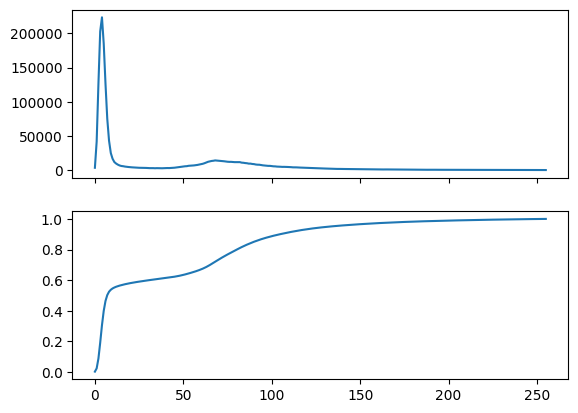

In [4]:
image = io.imread('../../data/new_data/raw/T2_UT168.nii')

hist = ndi.histogram(image, min = 0, max = 255, bins = 256)

# Create a cumulative distribution function aka equalization since the MRI data always skeewed
cdf = hist.cumsum() / hist.sum()

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
plt.show()

In [21]:
hist.shape

(256,)

In [22]:
# checking values for each pixel

print(np.amin(image))
print(np.amax(image))

0.043285586
709.14777


It seems that scan intensities are outside the range 0-255. Values exceed 255, so I need to normalize the image intensities to fit within the 0-255 range.

In [5]:
def normalizing(img):
    max_val = np.max(img)
    min_val = np.min(img)

    return (img - min_val) / (max_val - min_val) * 255

In [10]:
normalized_img = normalizing(image)
print(np.amin(normalized_img))
print(np.amax(normalized_img))

0.0
255.0


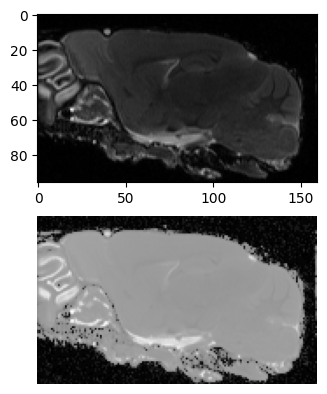

In [15]:
image_int = normalized_img.astype(np.int64) 

img_equalized = cdf[image_int] * 255

fig, axes = plt.subplots(2, 1)

axes[0].imshow(image_int[:,:,51], cmap = 'gray')
axes[1].imshow(img_equalized[:,:,51], cmap = 'gray')
plt.axis('off')
plt.show()

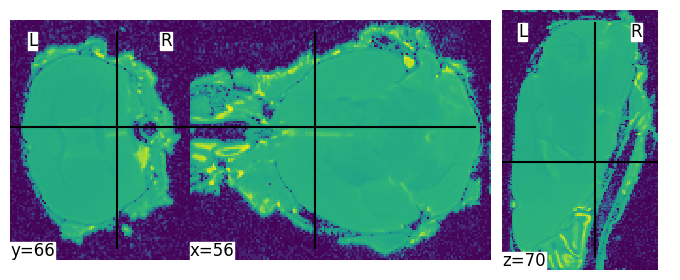